In [1]:
#!/usr/bin/env python

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pylab as pl
import seaborn as sn

import random
import sys

from sklearn.model_selection import train_test_split
from sklearn import metrics

from pandas import set_option
pd.options.mode.chained_assignment = None

from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from scipy.stats import truncnorm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
# Read the data from a text file
csv = pd.read_csv('Ca_all_data.txt', delimiter=',', header=None)

feat = np.array(csv[range(126)])
chg = np.array(csv[126])

In [3]:
name = list()
ele_tup=('H','C','N','O','Ca')
for i in range(1,13):
    name.append(f'deg_r{i:d}')
    name.append(f'bet_r{i:d}')
    name.append(f'clust_r{i:d}')
    name.append(f'clos_r{i:d}')
for i in ('Ca','wat'):
    name.append('deg_'+i)
    name.append('bet_'+i)
    name.append('clust_'+i)
    name.append('clos_'+i)
for cut in (2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0):
    for i in ele_tup:
        name.append(i+f'_{cut:2.1f}')
for cut in (3.0,6.0):
    for i in range(5):
        for j in range(i,5):
            name.append(ele_tup[i]+ele_tup[j]+f'_{cut:2.1f}')
name.append('Cachg')

In [4]:
csv.columns=name
csv=csv[csv.columns.drop(list(csv.filter(regex='Ca_')))]

In [69]:
clos_bet_cachg = pd.concat([csv['clos_Ca'], csv['bet_r10'], csv['Cachg']], axis=1)
np.savetxt("clos_bet_cachg.txt", clos_bet_cachg)

In [12]:
net_par=feat[:,:56]
data = np.reshape(net_par, [109438,4])
df = pd.DataFrame(data)
corrMatrix = df.corr()


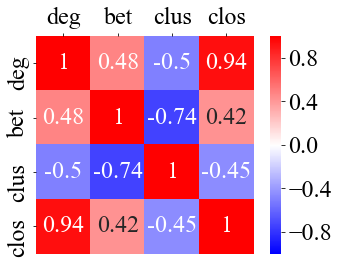

In [8]:
ticks=['deg', 'bet', 'clus', 'clos']
ax=sn.heatmap(corrMatrix, cmap = 'bwr', annot=True, square=True, xticklabels=ticks, yticklabels=ticks, vmin=-1, vmax=1)
ax.xaxis.tick_top()
plt.rcParams["figure.figsize"]=(5,5)
plt.show()